# Assignment 3: Decision Tree and Random Forest {-}

This assignment aims at familiarizing you with training and testing Decision Tree and Random Forest classification model. Here are the BASIC requirements of the assignment:

- Load the data.
- Analyze the data.
- Check if the data is imbalanced, possibly apply SMOTE to oversample or undersample data classes.
- Use GridSearchCV to find the best Decision Tree and Random Forest.
- Show the most important features.
- Visualize the tree.


The dataset you will be working on is 'data-employee-recruitment.csv'. It is composed of attributes such as employee gender, education level, company size, etc., to develop an employee recruitment prediction model.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment3-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment3 (e.g., ML4DS-2012345-Assigment3) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have data exploration and modeling steps other than the basic requirements. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [ ]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load the data

In [ ]:
# load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/ddutjnrevenge-universe/MachineLearningforDataScience/main/Assignment%203/data-employee-recruitment.csv')

In [ ]:
df.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,14569,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,10557,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,217,1.0
2,14095,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,12,1.0
3,16300,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,14550,0.534,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,52,1.0


A company is looking for potential candidates from a pool of training program attendants. The dataset contains attendant background (demographics, current company, i.e., data features) and whether he or she is looing for a job change (data label). The company wants to build a prediction model using this dataset. Here follows the data dictionary:

* enrollee_id : unique ID for candidate
* city_development_index : developement index of the city (scaled)
* gender: gender of candidate
* relevent_experience: relevant experience of candidate
* enrolled_university: type of university course enrolled if any
* education_level: education level of candidate
* major_discipline: education major discipline of candidate
* experience: candidate's total experience in years
* company_size: number of employees in the current company of candidate
* company_type : Type of current employer
* last_new_job: difference in years between previous job and current job
* training_hours: training hours completed
* target value: 0 – not looking for job change, 1 – looking for a job change

# Analyze the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2135 non-null   int64  
 1   city_development_index  2135 non-null   float64
 2   gender                  2135 non-null   object 
 3   relevent_experience     2135 non-null   object 
 4   enrolled_university     2135 non-null   object 
 5   education_level         2135 non-null   object 
 6   major_discipline        2135 non-null   object 
 7   experience              2135 non-null   object 
 8   company_size            2135 non-null   object 
 9   company_type            2135 non-null   object 
 10  last_new_job            2135 non-null   object 
 11  training_hours          2135 non-null   int64  
 12  target                  2135 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 217.0+ KB


We can tell from this information that this dataset does not have any null values!

In [ ]:
df.duplicated().sum()

0

No duplicates!

In [ ]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,2135.000000,2135.000000,2135.000000,2135.000000
mean,18059.164403,0.756329,65.296956,0.515222
std,9474.072705,0.145332,63.639919,0.499885
min,13.000000,0.450000,-5.000000,0.000000
25%,10631.000000,0.624000,22.000000,0.000000
50%,18450.000000,0.743000,45.000000,1.000000
75%,26543.500000,0.910000,87.500000,1.000000
max,33349.000000,1.026000,336.000000,1.000000


In [ ]:
print("Data shape: " + str(df.shape) + "\n")     # Shape of data frame

Data shape: (2135, 13)



In [ ]:
data = df.copy()

In [ ]:
# Drop Enrollee ID
data.drop(columns=["enrollee_id"], inplace=True)
data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,217,1.0
2,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,12,1.0
3,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,0.534,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,52,1.0


In [ ]:
# Get the values of each categorical feature
cat_cols = [col for col in data.columns if data[col].dtypes == "O"]
for col in cat_cols:
    print(col + ":", data[col].unique())

gender: ['Male' 'Female']
relevent_experience: ['Has relevent experience' 'No relevent experience']
enrolled_university: ['Full time course' 'Part time course']
education_level: ['Graduate' 'Masters' 'Phd']
major_discipline: ['STEM' 'Humanities' 'Other' 'No Major' 'Business Degree' 'Arts']
experience: ['2' '9' '4' '<1' '5' '3' '11' '10' '7' '12' '1' '16' '15' '8' '13' '17'
 '>20' '6' '19' '14' '18' '20']
company_size: ['50-99' '100-500' '<10' '10000+' '1000-4999' '10/49' '500-999'
 '5000-9999']
company_type: ['Pvt Ltd' 'Early Stage Startup' 'Funded Startup' 'NGO' 'Public Sector'
 'Other']
last_new_job: ['2' 'never' '1' '4' '3' '>4']


In [ ]:
import seaborn as sns
sns.set()

<ipython-input-12-cf36f316f52c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data = data, order=data[col].value_counts().index, palette="husl")


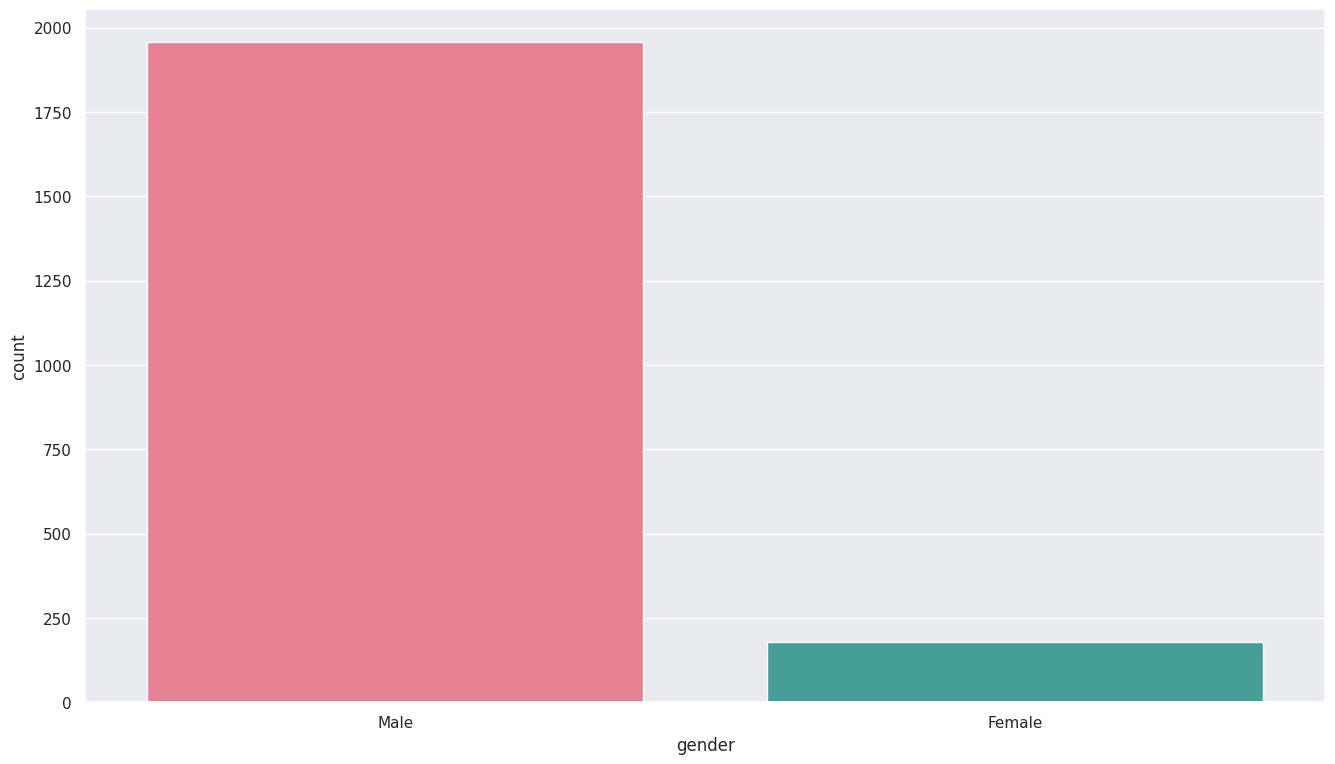

<ipython-input-12-cf36f316f52c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data = data, order=data[col].value_counts().index, palette="husl")


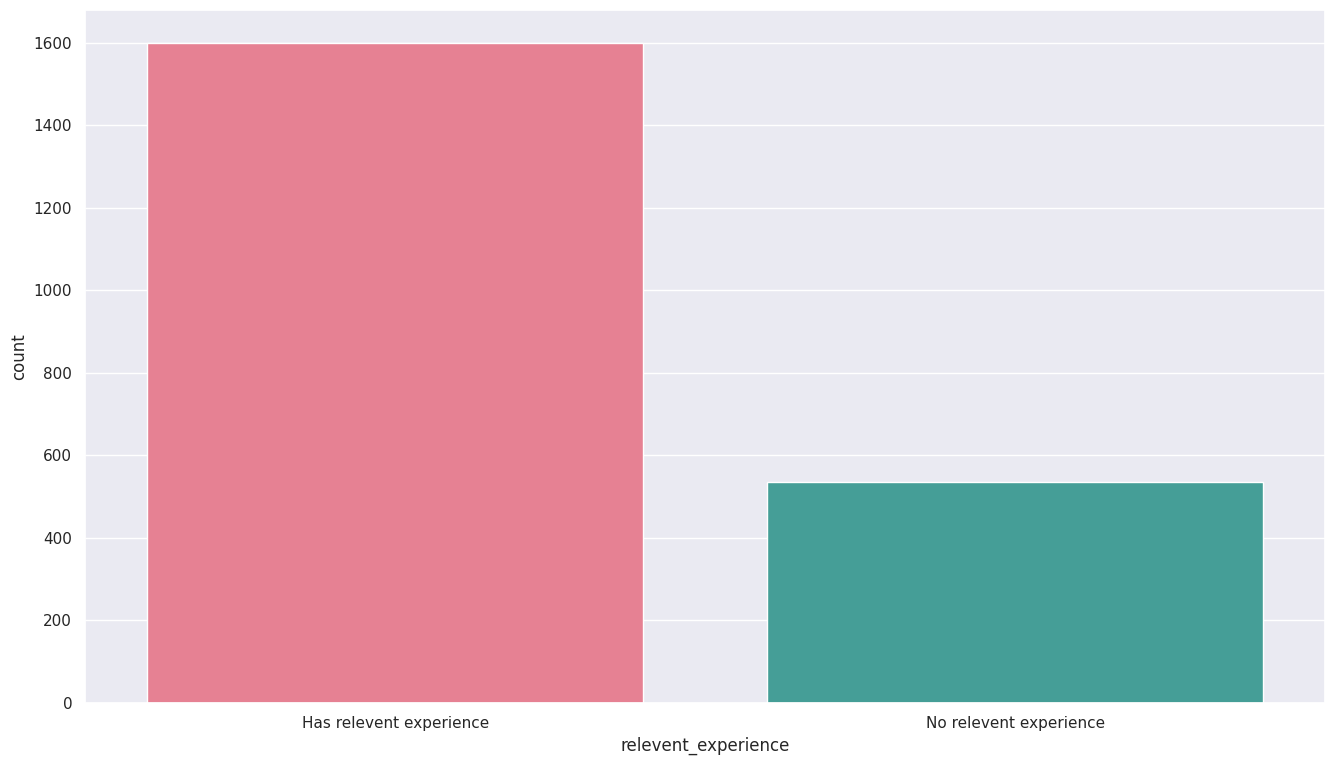

<ipython-input-12-cf36f316f52c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data = data, order=data[col].value_counts().index, palette="husl")


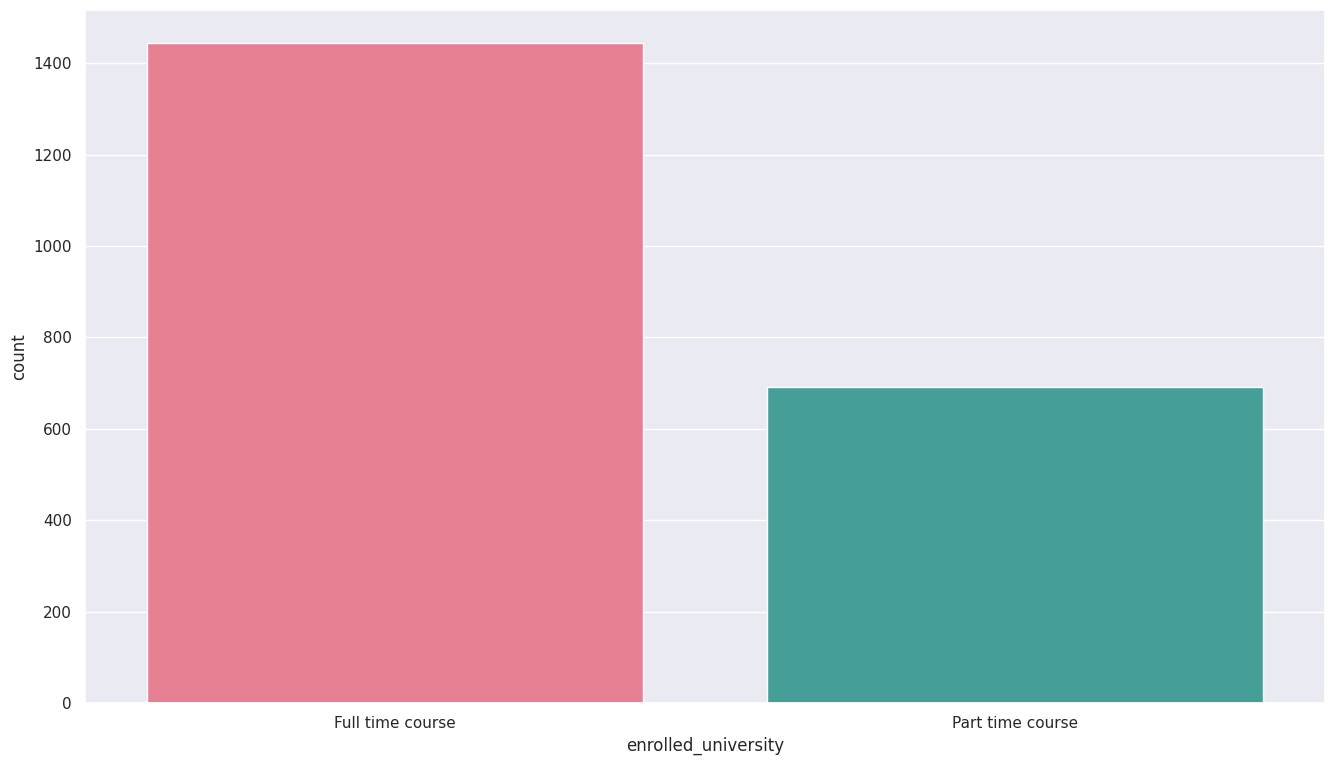

<ipython-input-12-cf36f316f52c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data = data, order=data[col].value_counts().index, palette="husl")


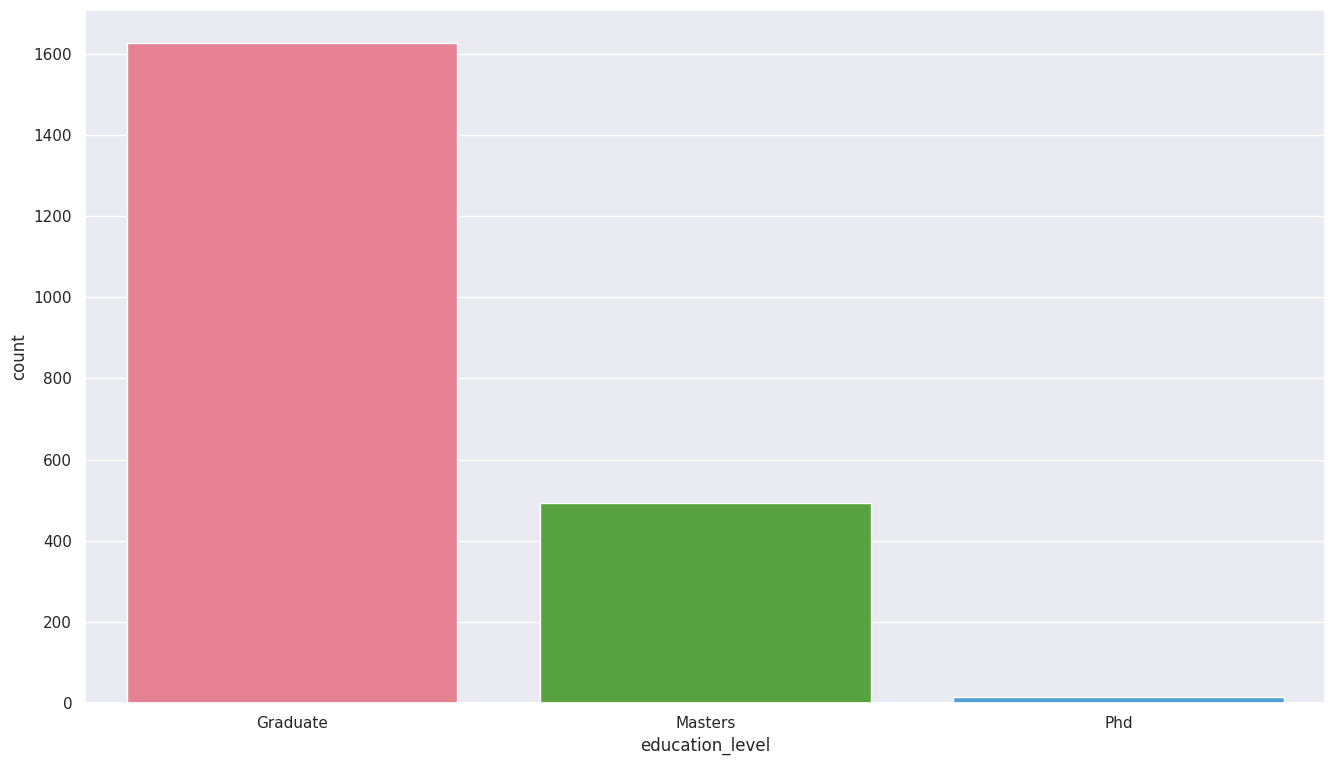

<ipython-input-12-cf36f316f52c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data = data, order=data[col].value_counts().index, palette="husl")


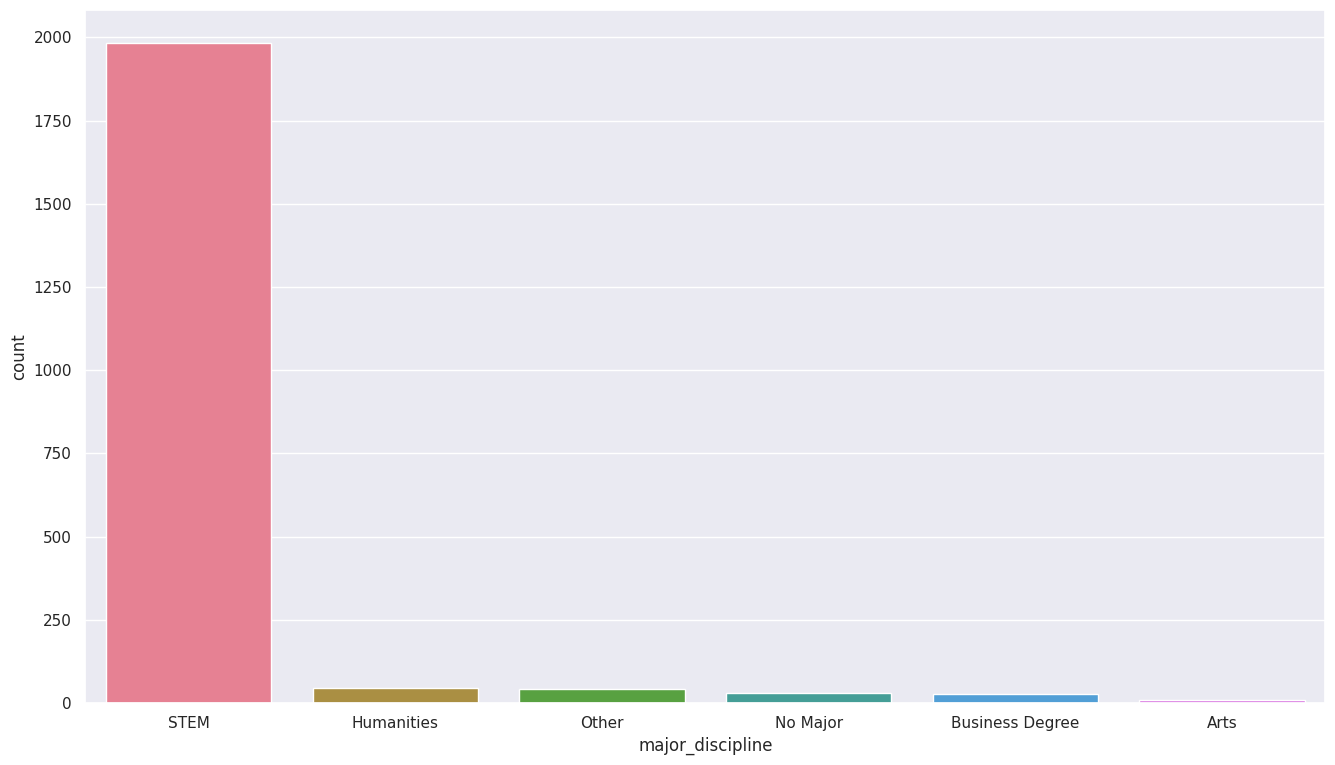

<ipython-input-12-cf36f316f52c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data = data, order=data[col].value_counts().index, palette="husl")


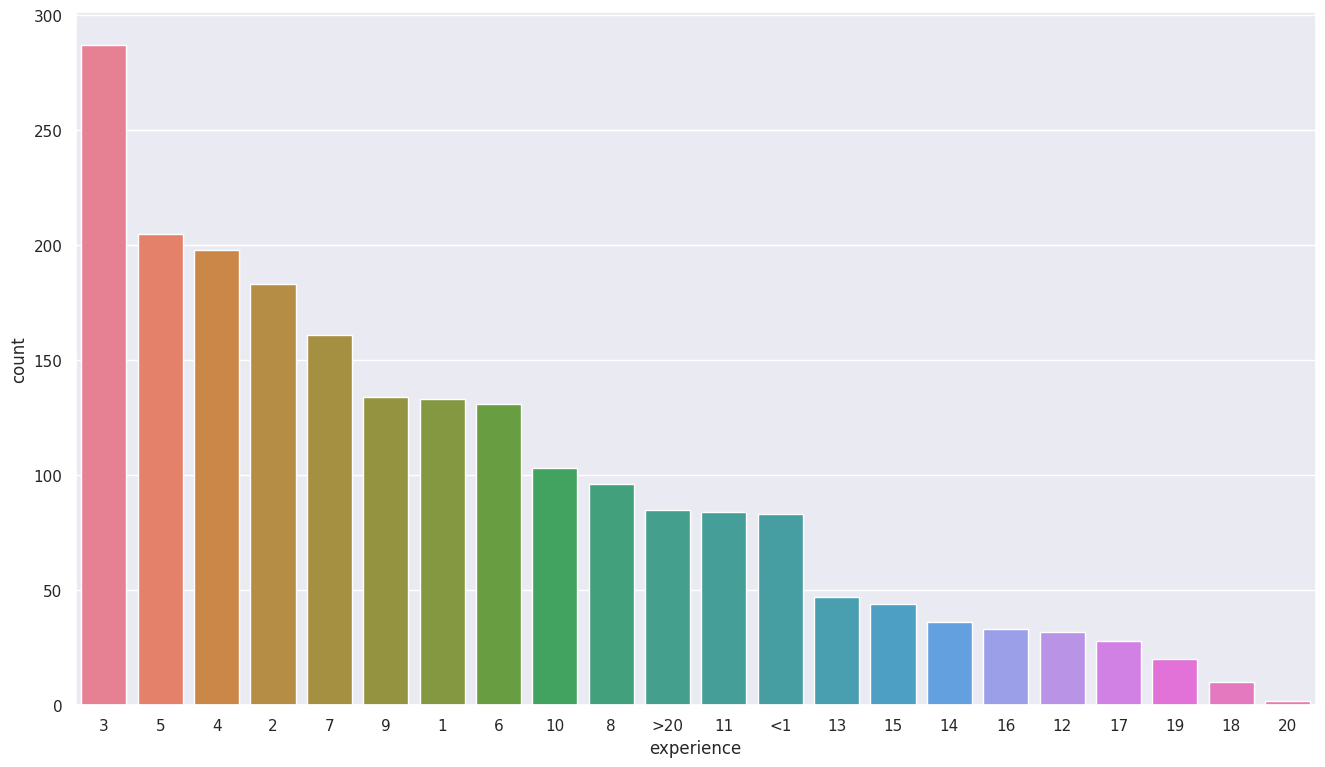

<ipython-input-12-cf36f316f52c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data = data, order=data[col].value_counts().index, palette="husl")


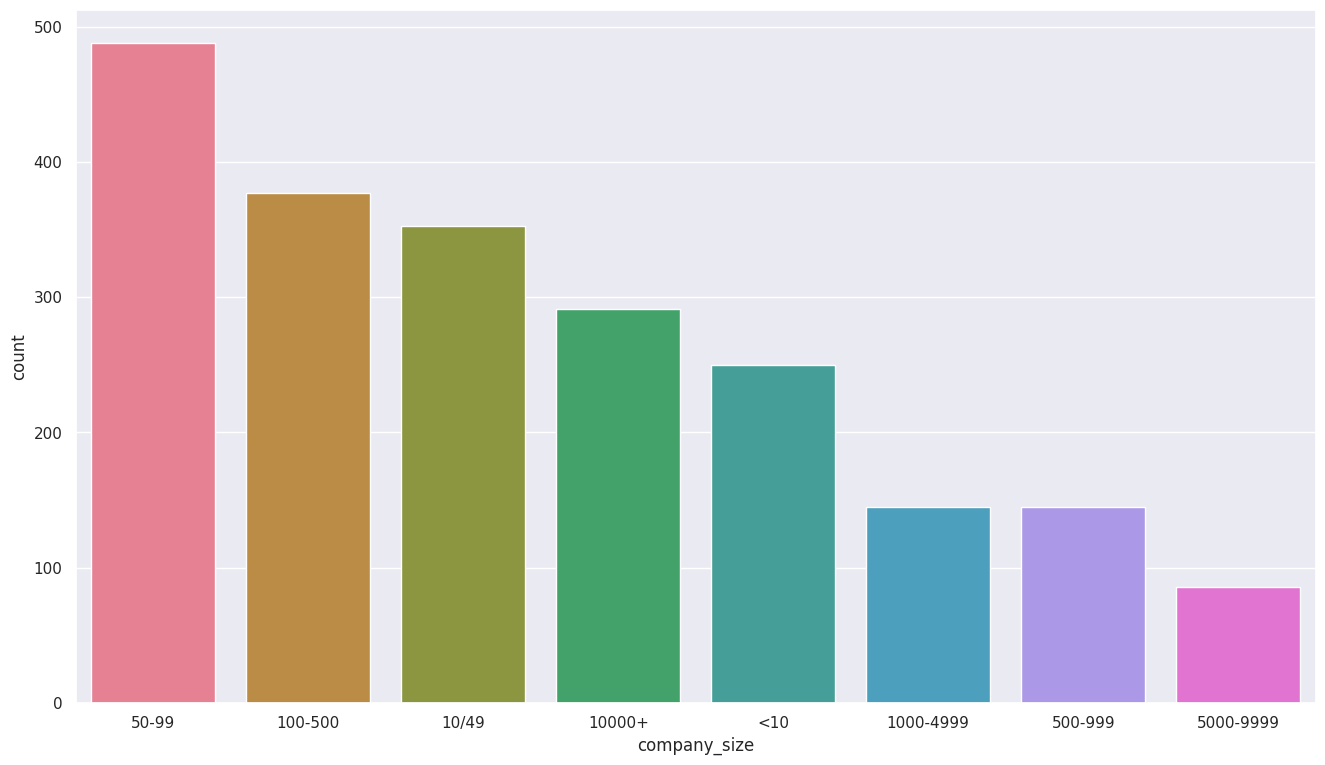

<ipython-input-12-cf36f316f52c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data = data, order=data[col].value_counts().index, palette="husl")


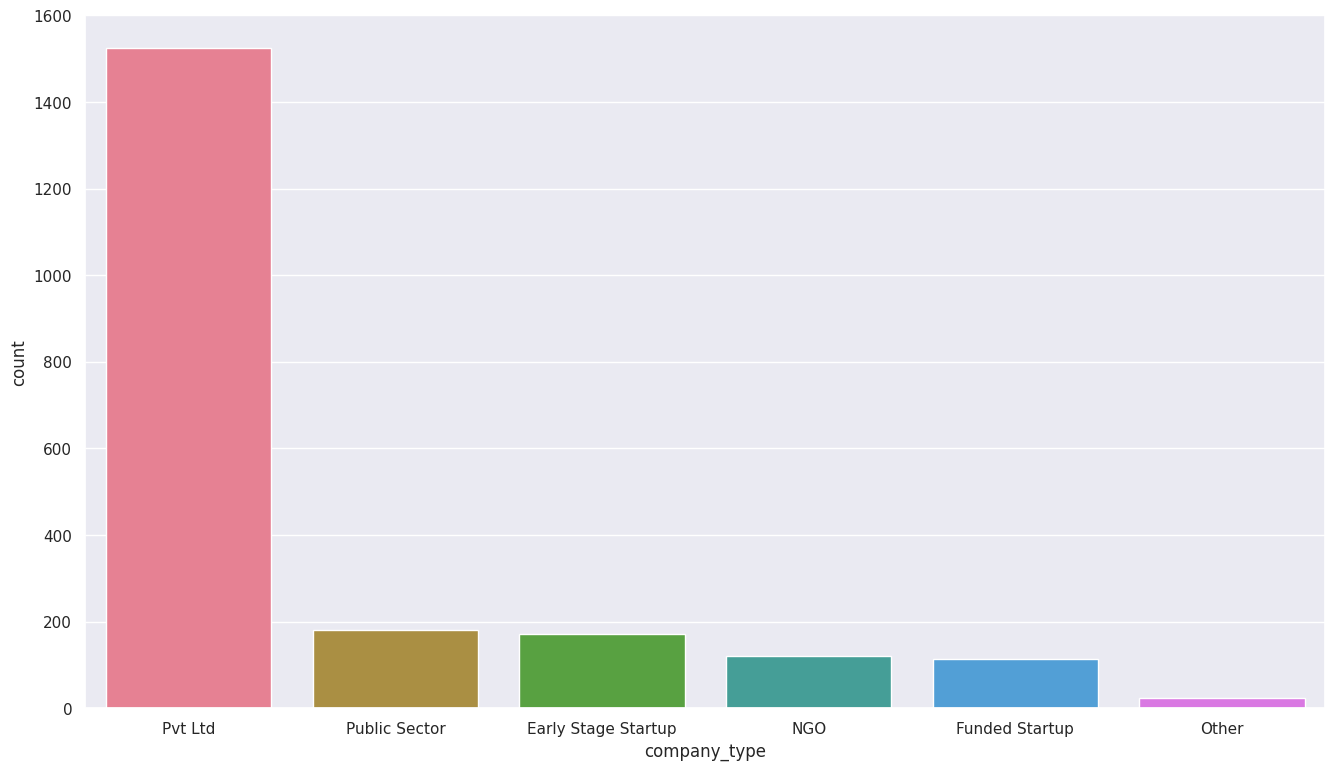

<ipython-input-12-cf36f316f52c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data = data, order=data[col].value_counts().index, palette="husl")


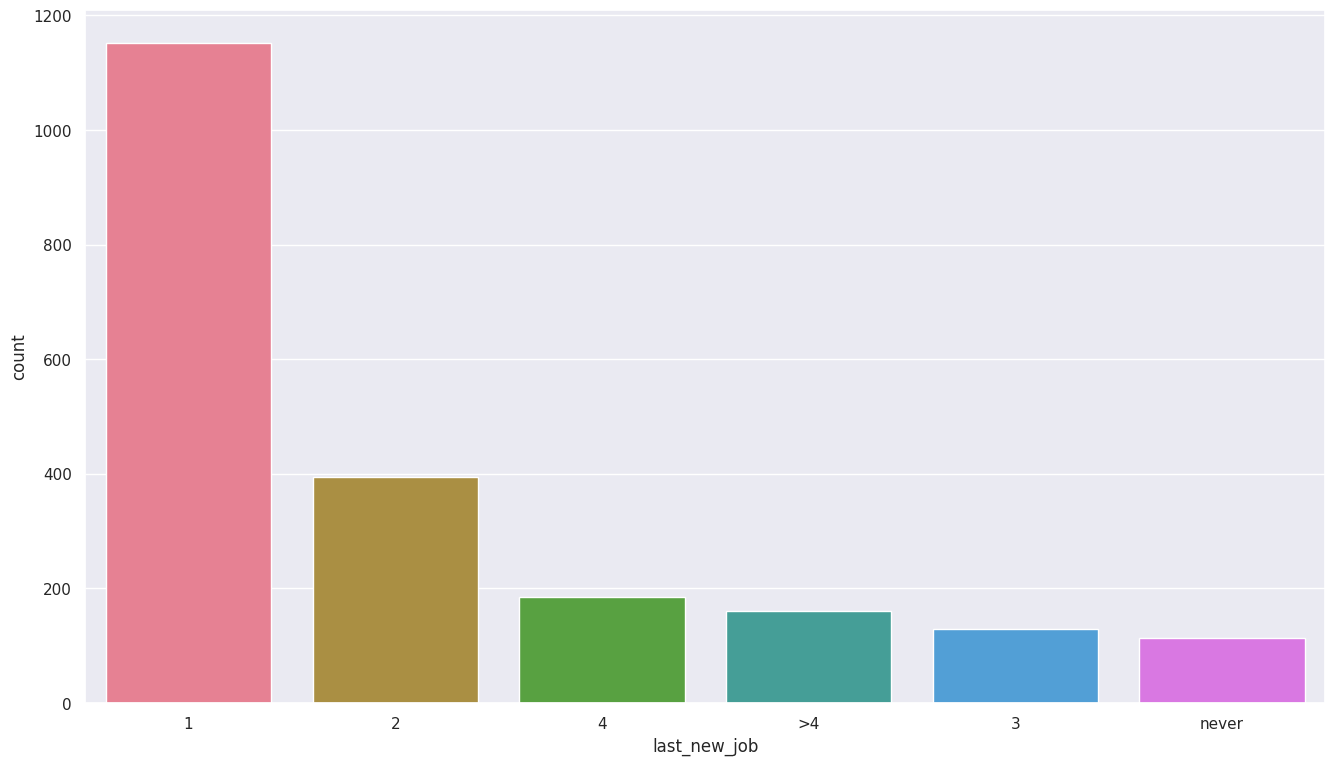

In [ ]:
# Visualize the number of data samples in each categorical feature
for col in cat_cols:
    plt.figure(figsize=(16,9))
    sns.countplot(x=col, data = data, order=data[col].value_counts().index, palette="husl")
    plt.show()

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'training_hours'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

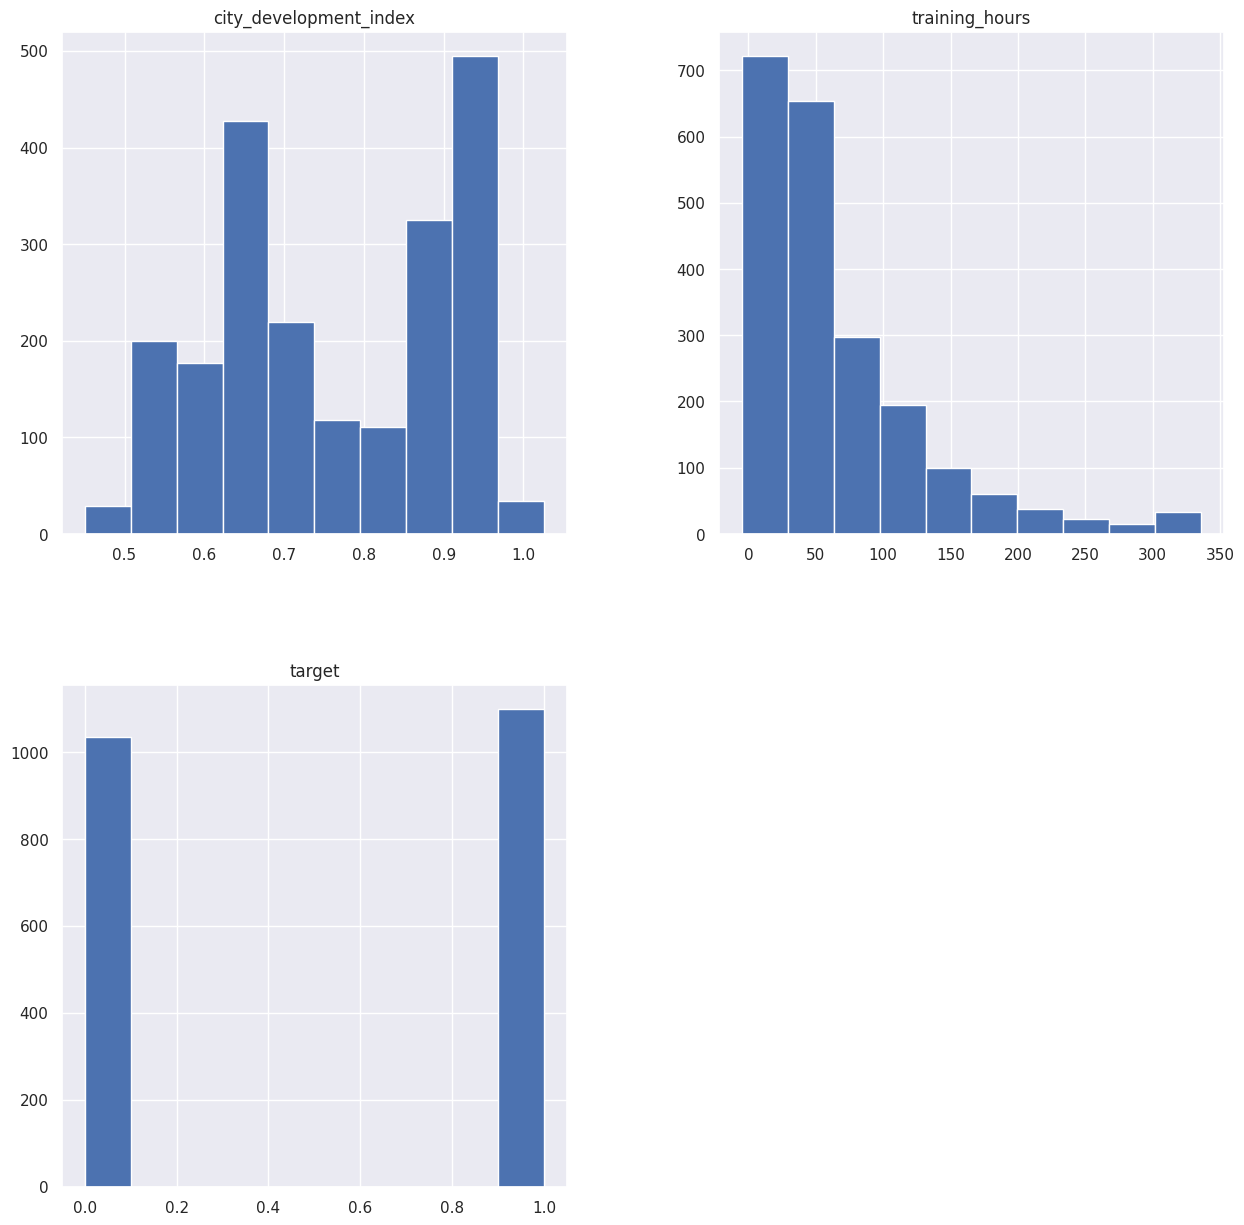

In [ ]:
data.hist(figsize=(15,15))

In [ ]:
# Transform the categorical to numerical features
data.replace(['<1', 'never'], 0, inplace = True)
data.replace('>20', 21, inplace = True)
data.replace('>4', 5, inplace = True)

data['experience'] = data['experience'].astype(int)
data['last_new_job'] = data['last_new_job'].astype(int)

data['company_size'] = data['company_size'].map({'<10': 0, '10/49': 1, '50-99': 2, '100-500': 3, '500-999': 4, '1000-4999': 5, '5000-9999': 6, '10000+': 7})
data['education_level'] = data['education_level'].map({'Graduate': 0, 'Masters': 1, 'Phd': 2})

In [ ]:
# Transform the rest of categorical variables to numerical by one-hot encoding variables
data = pd.get_dummies(data)

In [ ]:
data

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Female,gender_Male,relevent_experience_Has relevent experience,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.704,0,2,2,2,71,1.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
1,0.594,1,9,2,0,217,1.0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
2,0.596,0,2,3,2,12,1.0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
3,0.614,1,4,2,1,20,1.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
4,0.534,0,0,2,1,52,1.0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,0.698,0,3,1,1,14,0.0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2131,0.920,0,3,7,1,94,0.0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2132,0.926,1,19,2,4,27,0.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
2133,0.895,1,21,5,5,18,0.0,0,1,1,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
data.drop(columns=['gender_Male', 'relevent_experience_No relevent experience', 'enrolled_university_Part time course'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   city_development_index                       2135 non-null   float64
 1   education_level                              2135 non-null   int64  
 2   experience                                   2135 non-null   int64  
 3   company_size                                 2135 non-null   int64  
 4   last_new_job                                 2135 non-null   int64  
 5   training_hours                               2135 non-null   int64  
 6   target                                       2135 non-null   float64
 7   gender_Female                                2135 non-null   uint8  
 8   relevent_experience_Has relevent experience  2135 non-null   uint8  
 9   enrolled_university_Full time course         2135 non-null   uint8  
 10  

In [ ]:
#Female:1, Male:0 - Relevent Exp:1, No exp: 0 - Full time: 1, Part-time: 0
data = data.rename(columns= {'gender_Female': 'gender', 'relevent_experience_Has relevent experience': 'relevent_experience', 'enrolled_university_Full time course': 'enrolled_university'})
data

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender,relevent_experience,enrolled_university,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.704,0,2,2,2,71,1.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
1,0.594,1,9,2,0,217,1.0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
2,0.596,0,2,3,2,12,1.0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0.614,1,4,2,1,20,1.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
4,0.534,0,0,2,1,52,1.0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,0.698,0,3,1,1,14,0.0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2131,0.920,0,3,7,1,94,0.0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2132,0.926,1,19,2,4,27,0.0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
2133,0.895,1,21,5,5,18,0.0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


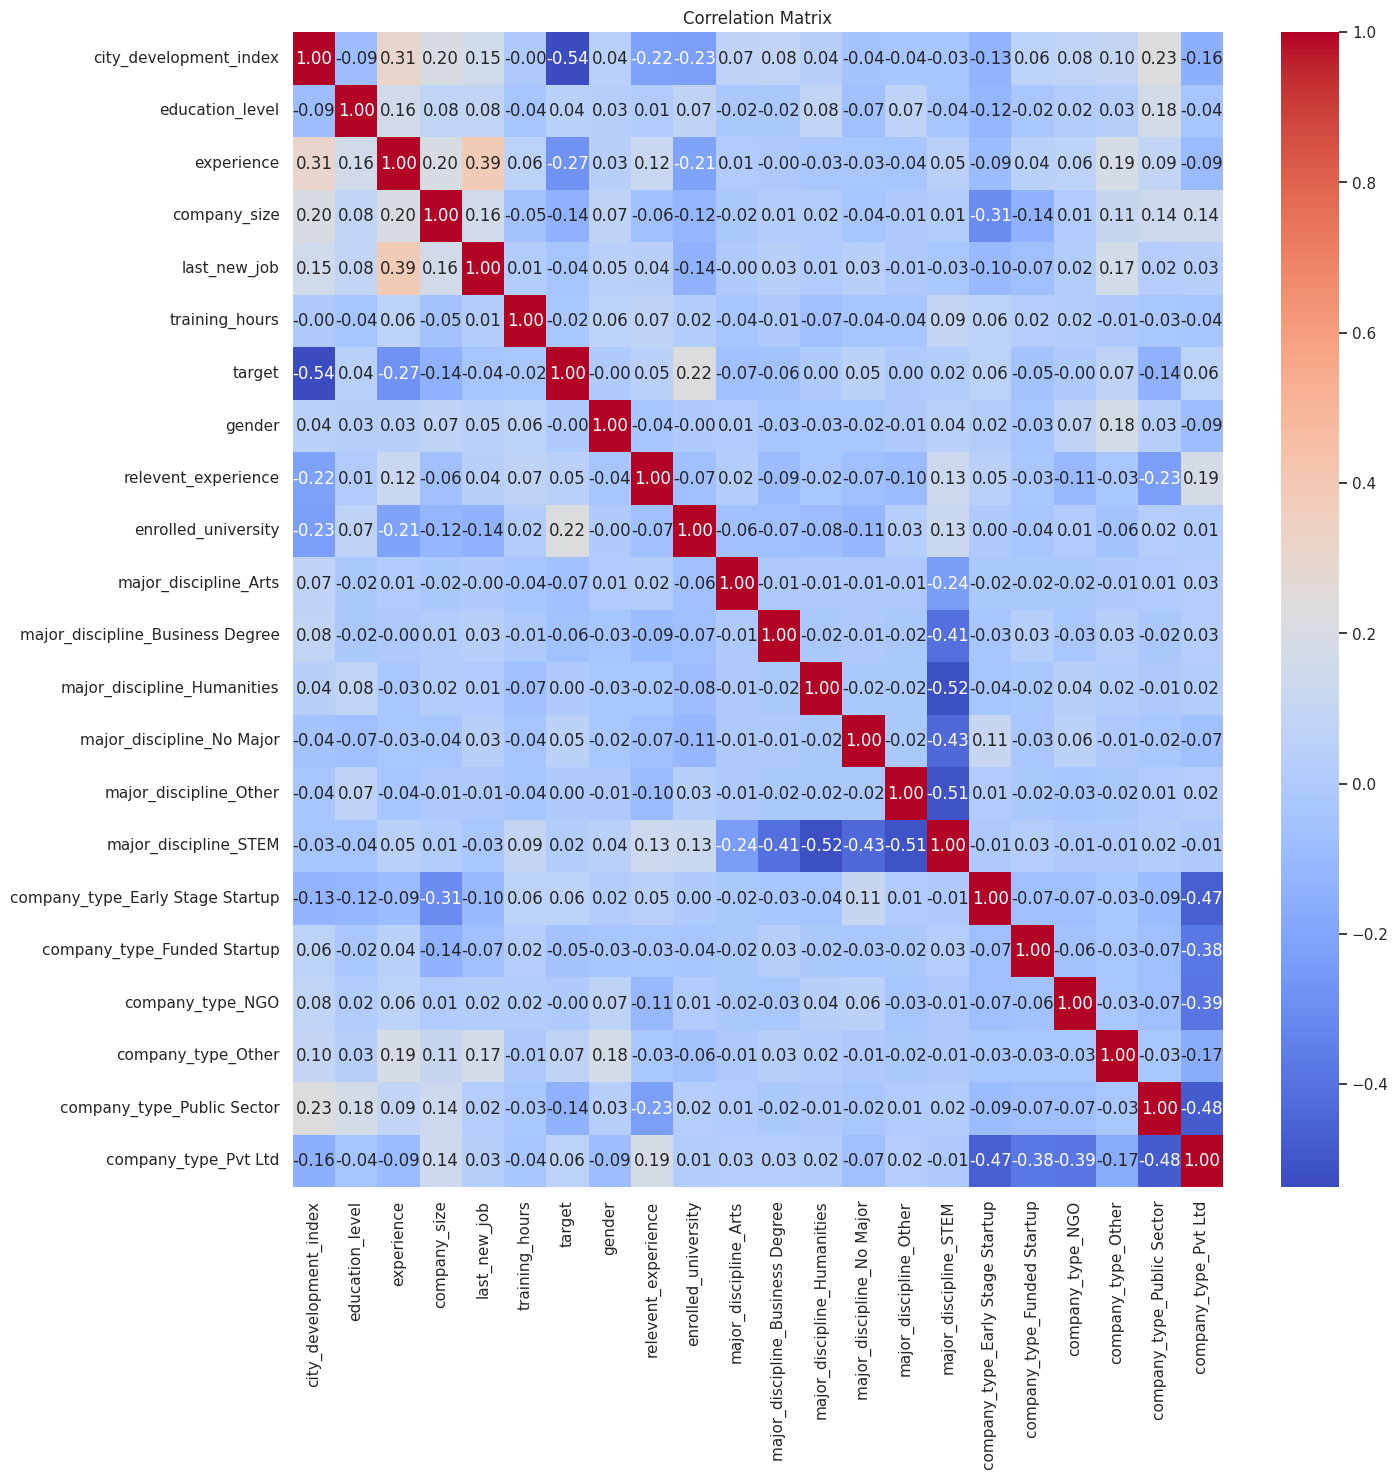

In [ ]:
# Visualize the correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Based on this correlation matrix, we can observe a correlation coefficient of -0.54 between the "city_development_index" and the "target" variable which suggests a moderately strong negative correlation between these two variables.We can have a slight "initial guess" that this may suggest that the level of urban development plays a role in individuals' decisions regarding employment stability and job-seeking behaviors. However, correlation does not imply causation, so further analysis and exploration would be needed to understand the underlying factors driving this relationship.

# Check if the data is imbalanced

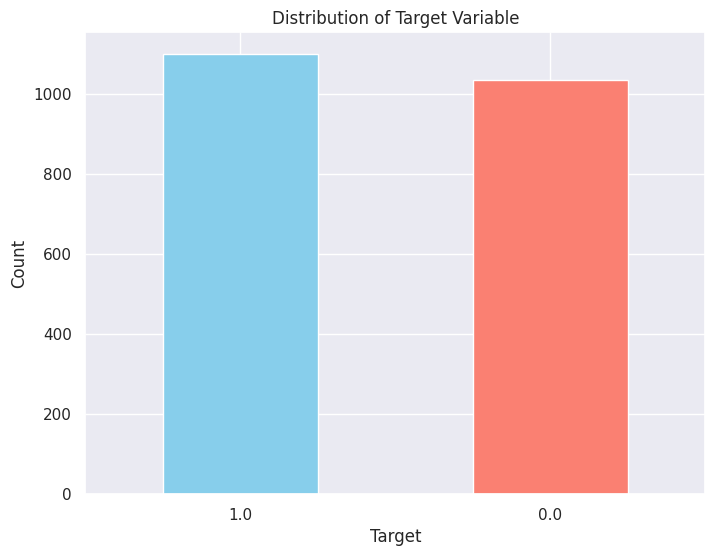

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
data['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Drop the column 'left' because it is the data label
X = data.drop(columns=["target"])

# Assign data label to to variable 'y'
y = data.target

In [ ]:
# Check for class imbalance
print(data['target'].value_counts())

1.0    1100
0.0    1035
Name: target, dtype: int64


In [ ]:
# Load libraries
from sklearn.model_selection import train_test_split, GridSearchCV

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=1, test_size=0.2)

In [ ]:
# Before oversampling
print("Before oversampling: " + str(X_train.shape))
print(np.unique(y_train, return_counts=True))                  # Print number of labels, label '0' dominates '1'

Before oversampling: (1708, 21)
(array([0., 1.]), array([836, 872]))


The dataset is quite balanced so there's no need to apply oversampling method!
 (0:48.95%, 1:51.05%)

In [ ]:
# # Apply SMOTE to handle class imbalance
# from imblearn.over_sampling import SMOTE     # Load the SMOTE library
# smote = SMOTE(random_state=42)
# X_train_oversampling, y_train_oversampling = smote.fit_resample(X_train, y_train)

In [ ]:
# # Before oversampling
# print("Before oversampling: " + str(X_train.shape))
# print(np.unique(y_train, return_counts=True))                  # Print number of labels, label '1' dominates '0'

# # After oversampling
# print("After oversampling: " + str(X_train_oversampling.shape))
# print(np.unique(y_train_oversampling, return_counts=True))     # Print number of labels, now label '0' and '1' have the same number of labels.

# Use GridSearchCV to find the best Decision Tree and Random Forest

## Decision Tree

In [ ]:
# Import GridSearchCV for finding the best hyper-parameter set.
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [3, 5, 7],                           # Maximum depth of the tree
         "min_samples_split": [4, 8, 10]}                   # Stop splitting condition.

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5)

In [ ]:
# Run the search on oversampled training data samples.
# grid_search.fit(X_train_oversampling, y_train_oversampling)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [4, 8, 10]})

In [ ]:
print("Best parameters for Decision Tree:", grid_search.best_params_)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 4}


In [ ]:
# Build a decision tree model pipeline from the best set of hyper-parameters found
model_dt = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'], max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])

In [ ]:
# Train the decision tree model
# model_dt.fit(X_train_oversampling, y_train_oversampling)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4)

In [ ]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_dt.predict(X_test)

print(classification_report(y_test, pred_y))

# Note 1: macro avg = (precision_0 + precision_1) / 2
# Note 2: weighted avg = (support_0 * precision_0 + support_1 * precision_1) / number_of_samples

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       199
         1.0       0.82      0.83      0.83       228

    accuracy                           0.81       427
   macro avg       0.81      0.81      0.81       427
weighted avg       0.81      0.81      0.81       427



## Random Forest

In [ ]:
# Building a RandomForest is similar to building a decision tree, but there is an additional hyper-parameter called n_estimators which is the number of trees in the forest.
from sklearn.ensemble import RandomForestClassifier

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [7, 9, 11],                           # Maximum depth of the tree
         "min_samples_split": [8, 12, 16]}                   # Stop splitting condition.

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=10, n_jobs=10), param_grid=params, cv= 5) # Number of trees in the forest is 10

# Run the search on oversampled training data samples.
# grid_search_rf.fit(X_train_oversampling, y_train_oversampling)     # Train the RandomForest
grid_search_rf.fit(X_train, y_train)     # Train the RandomForest

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10, n_jobs=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11],
                         'min_samples_split': [8, 12, 16]})

In [ ]:
# Best set of hyper parameters of the Random Forest
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 8}


In [ ]:
# Build a Random Forest model pipeline from the best set of hyper-parameters found
model_rf = RandomForestClassifier(n_estimators=100, random_state=1, criterion=grid_search_rf.best_params_['criterion'], max_depth=grid_search_rf.best_params_['max_depth'], min_samples_split=grid_search_rf.best_params_['min_samples_split'])     # Initialize the RandomForest

In [ ]:
# Train the Random Forest model
model_rf.fit(X_train, y_train)
# model_rf.fit(X_train_oversampling, y_train_oversampling)

RandomForestClassifier(max_depth=11, min_samples_split=8, random_state=1)

In [ ]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_rf.predict(X_test)

print(classification_report(y_test, pred_y))

# Note: theoretically saying, there is no guarantee that the Random Forest is alsways better than the Decision Tree, i.e., the model ensembling is not always better than a single model in general.

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       199
         1.0       0.87      0.87      0.87       228

    accuracy                           0.86       427
   macro avg       0.86      0.86      0.86       427
weighted avg       0.86      0.86      0.86       427



# Feature Importance

city_development_index              0.848606
education_level                     0.000000
experience                          0.047351
company_size                        0.012218
last_new_job                        0.059712
training_hours                      0.011239
gender                              0.000000
relevent_experience                 0.000000
enrolled_university                 0.009832
major_discipline_Arts               0.000000
major_discipline_Business Degree    0.000000
major_discipline_Humanities         0.000000
major_discipline_No Major           0.000000
major_discipline_Other              0.000000
major_discipline_STEM               0.000000
company_type_Early Stage Startup    0.005795
company_type_Funded Startup         0.000000
company_type_NGO                    0.000000
company_type_Other                  0.005247
company_type_Public Sector          0.000000
company_type_Pvt Ltd                0.000000
dtype: float64


<Axes: >

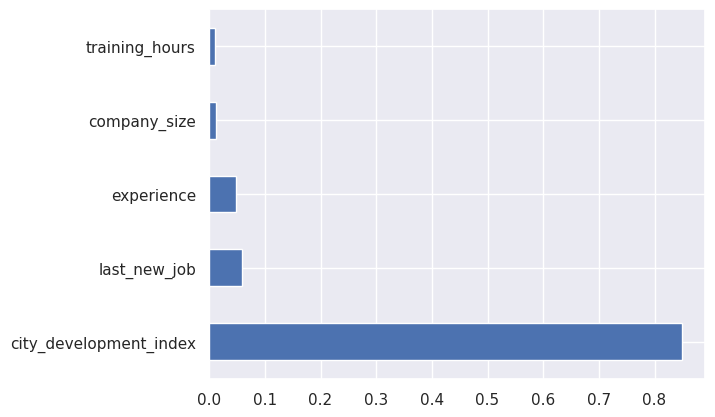

In [ ]:
# Print the importance level of each feature
weights = model_dt.feature_importances_     # Feature importance scores.
cols = X.columns                            # Corresponding names of important features.
feature_importances = pd.Series(weights, index=cols)     # Generate Series containing importance level
print(feature_importances)

# Plot the five most important features
feature_importances.nlargest(5).plot(kind="barh")

In [ ]:
# !pip install graphviz

# Visualize the tree

## Classification Decision Tree

In [ ]:
# Visualize the tree. Note: to run dot command, we have to install 'graphviz'
from sklearn import tree
tree.export_graphviz(decision_tree=model_dt, out_file='classification-tree.dot', feature_names=X.columns)     # Save model as 'classification-tree.dot'


In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'classification-tree.dot', '-o', 'classification-tree.png', '-Gdpi=300'])        # Convert the model to an image

0

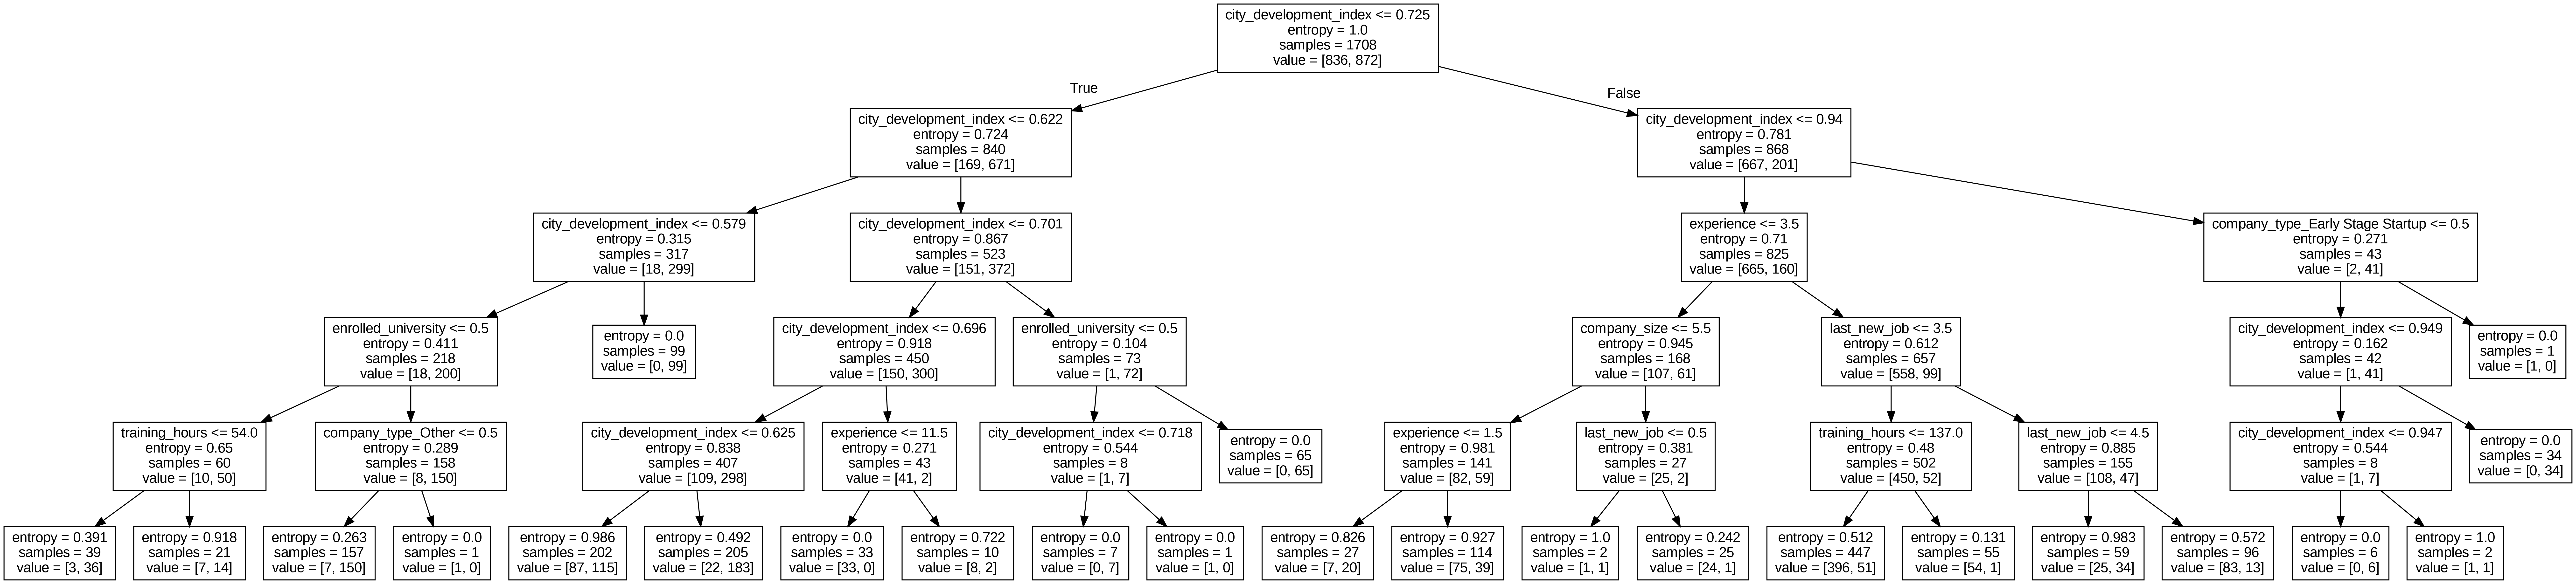

In [ ]:
from IPython.display import Image
Image(filename = 'classification-tree.png')     # Load and display file 'classification-tree.png'

## Classification Tree on Entropy

In [ ]:
# Build a classification tree based on Entropy
from sklearn.tree import DecisionTreeClassifier
model_fi_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=10)
model_fi_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=10)

In [ ]:
# Visualize the tree. Note: to run dot command, we have to install 'graphviz'
from sklearn import tree
tree.export_graphviz(decision_tree=model_fi_entropy, out_file='classification-tree-entropy.dot', feature_names=X.columns)     # Save model as 'classification-tree-entropy.dot'
from subprocess import call
call(['dot', '-Tpng', 'classification-tree-entropy.dot', '-o', 'classification-tree-entropy.png', '-Gdpi=300'])        # Convert the model to an image

0

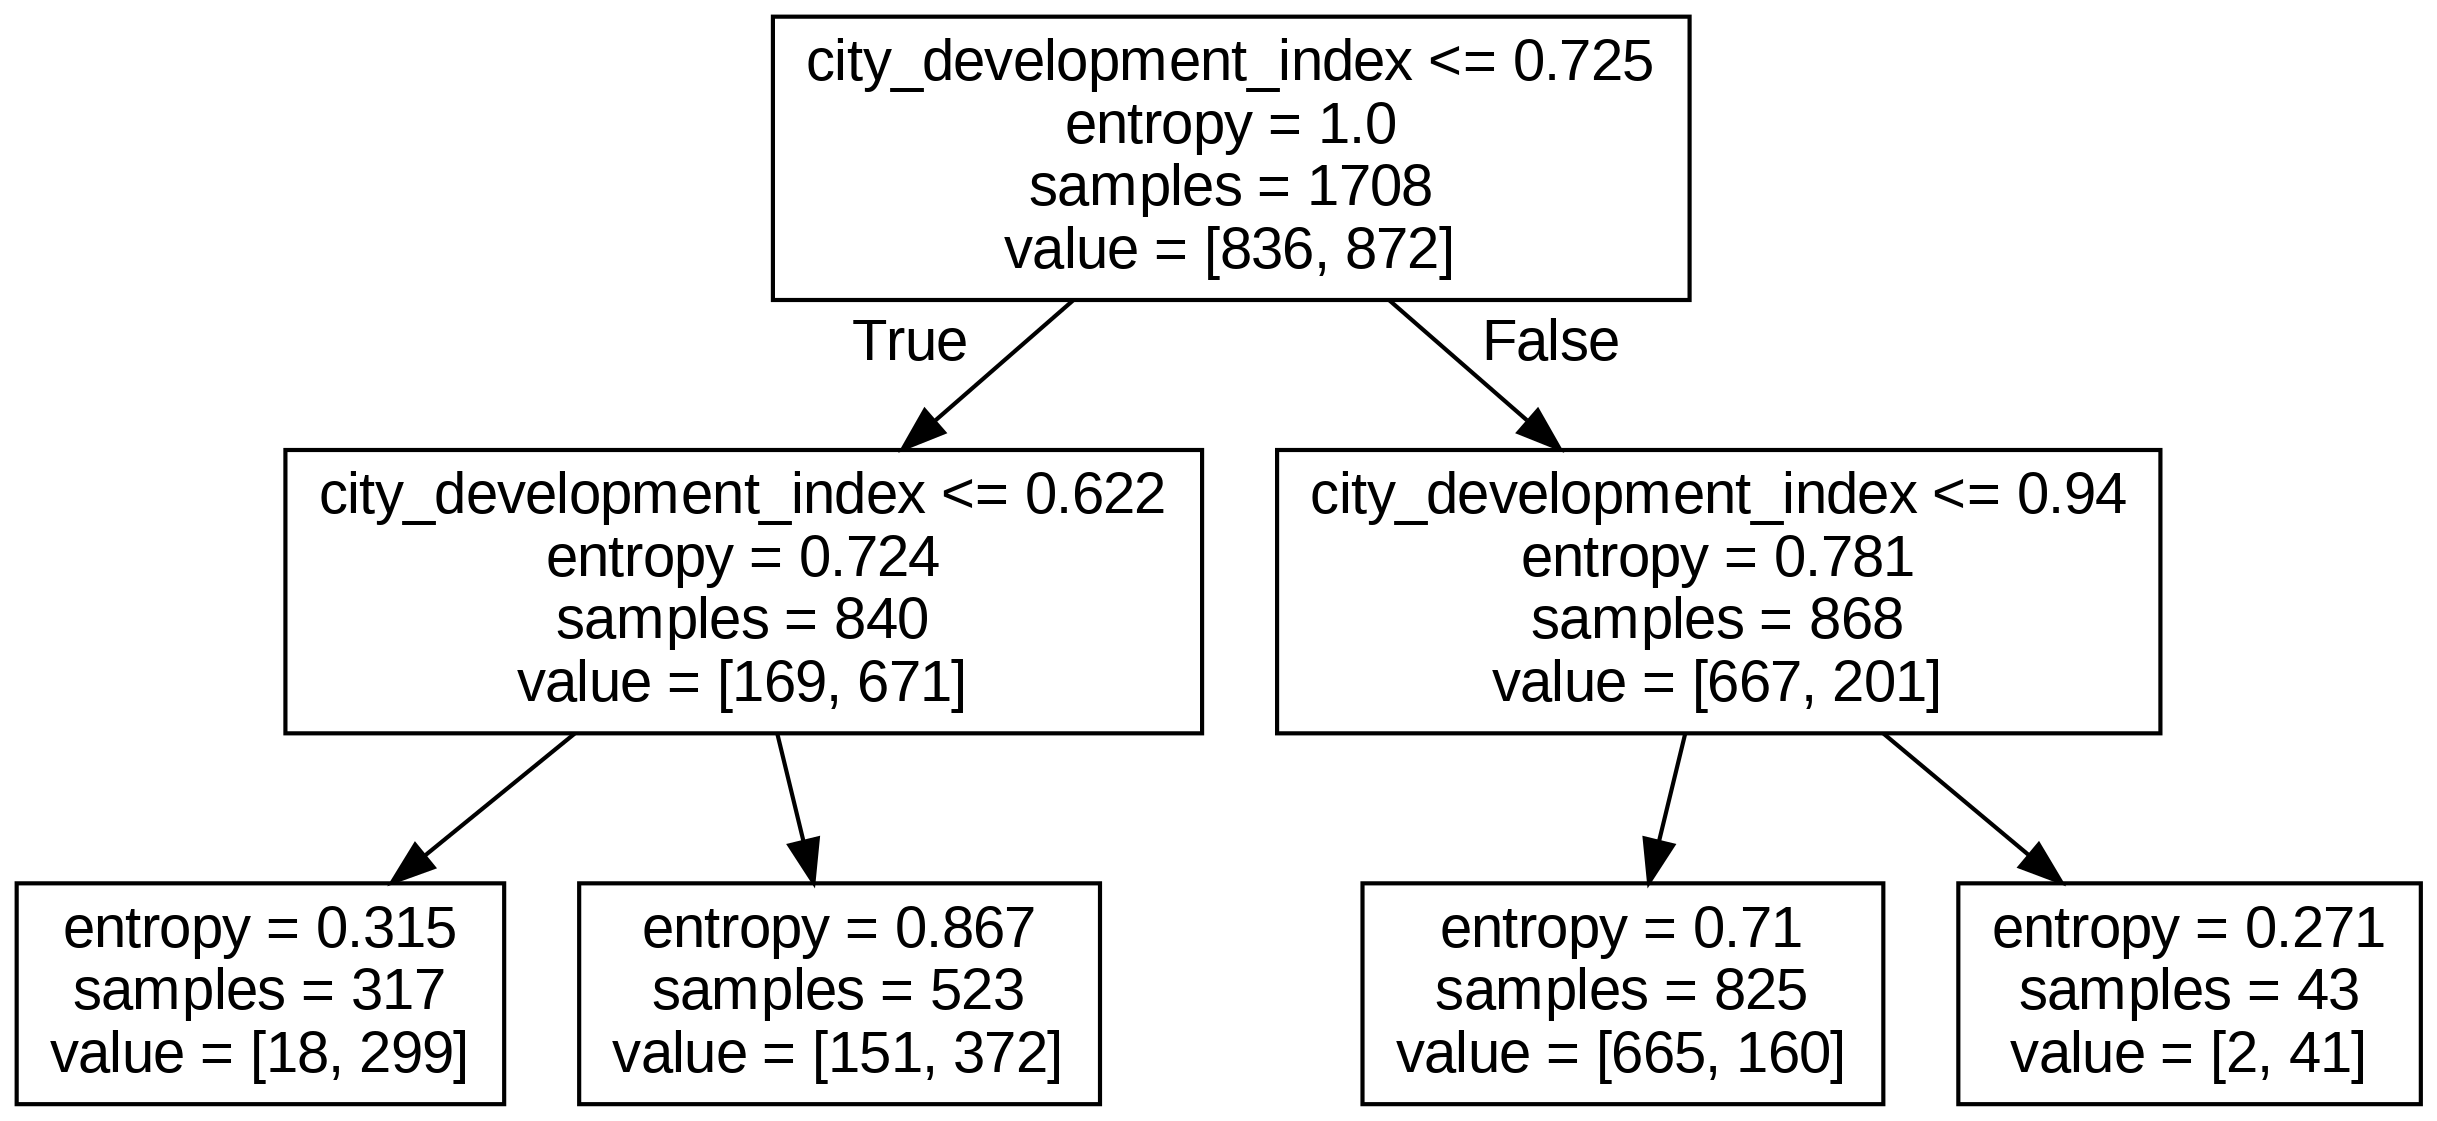

In [ ]:
from IPython.display import Image
Image(filename = 'classification-tree-entropy.png')     # Load and display file 'classification-tree.png'

city_development_index              1.0
education_level                     0.0
experience                          0.0
company_size                        0.0
last_new_job                        0.0
training_hours                      0.0
gender                              0.0
relevent_experience                 0.0
enrolled_university                 0.0
major_discipline_Arts               0.0
major_discipline_Business Degree    0.0
major_discipline_Humanities         0.0
major_discipline_No Major           0.0
major_discipline_Other              0.0
major_discipline_STEM               0.0
company_type_Early Stage Startup    0.0
company_type_Funded Startup         0.0
company_type_NGO                    0.0
company_type_Other                  0.0
company_type_Public Sector          0.0
company_type_Pvt Ltd                0.0
dtype: float64


<Axes: >

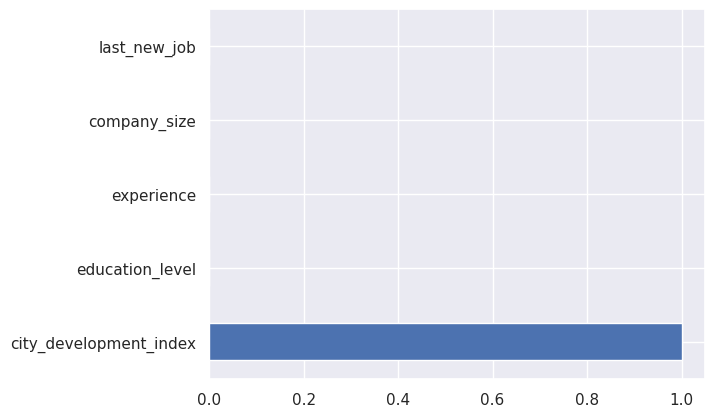

In [ ]:
# Print the importance level of each feature
weights_entropy = model_fi_entropy.feature_importances_     # Feature importance scores.
cols = X.columns                                            # Corresponding names of important features.
feature_importances_entropy = pd.Series(weights_entropy, index=cols)     # Generate Series containing importance level
print(feature_importances_entropy)

# Plot the five most important features
feature_importances_entropy.nlargest(5).plot(kind="barh")

### Classification Tree on Gini

In [ ]:
# Build a classification tree based on Gini
from sklearn.tree import DecisionTreeClassifier
model_fi_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_split=10)
model_fi_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=10)

In [ ]:
# Visualize the tree. Note: to run dot command, we have to install 'graphviz'
from sklearn import tree
tree.export_graphviz(decision_tree=model_fi_gini, out_file='classification-tree-gini.dot', feature_names=X.columns)     # Save model as 'classification-tree-gini.dot'
from subprocess import call
call(['dot', '-Tpng', 'classification-tree-gini.dot', '-o', 'classification-tree-gini.png', '-Gdpi=300'])        # Convert the model to an image

0

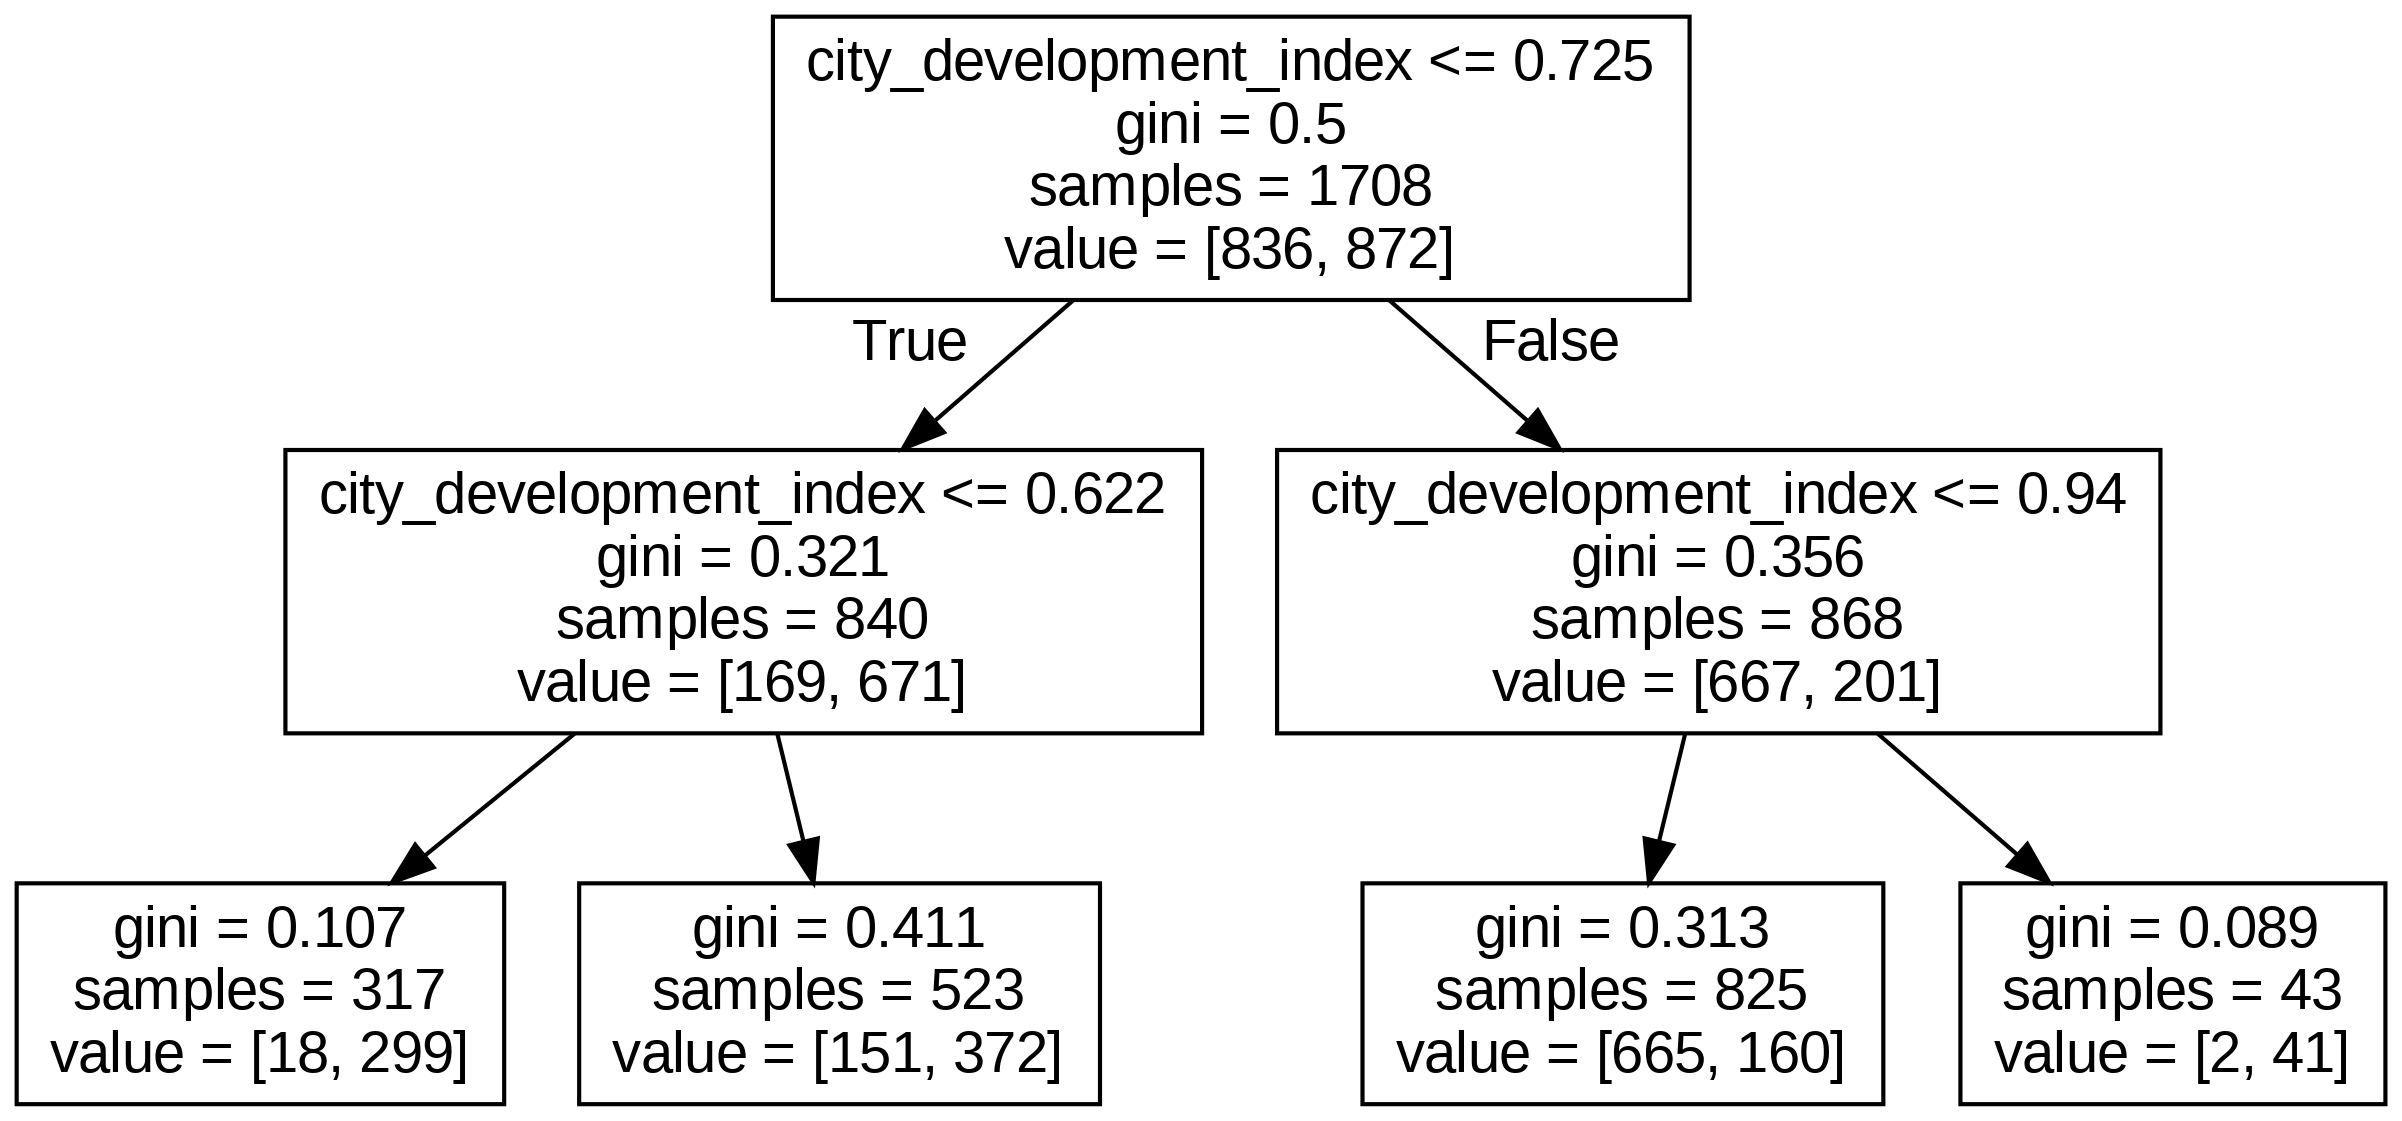

In [ ]:
from IPython.display import Image
Image(filename = 'classification-tree-gini.png')     # Load and display file 'classification-tree-gini.png'

city_development_index              1.0
education_level                     0.0
experience                          0.0
company_size                        0.0
last_new_job                        0.0
training_hours                      0.0
gender                              0.0
relevent_experience                 0.0
enrolled_university                 0.0
major_discipline_Arts               0.0
major_discipline_Business Degree    0.0
major_discipline_Humanities         0.0
major_discipline_No Major           0.0
major_discipline_Other              0.0
major_discipline_STEM               0.0
company_type_Early Stage Startup    0.0
company_type_Funded Startup         0.0
company_type_NGO                    0.0
company_type_Other                  0.0
company_type_Public Sector          0.0
company_type_Pvt Ltd                0.0
dtype: float64


<Axes: >

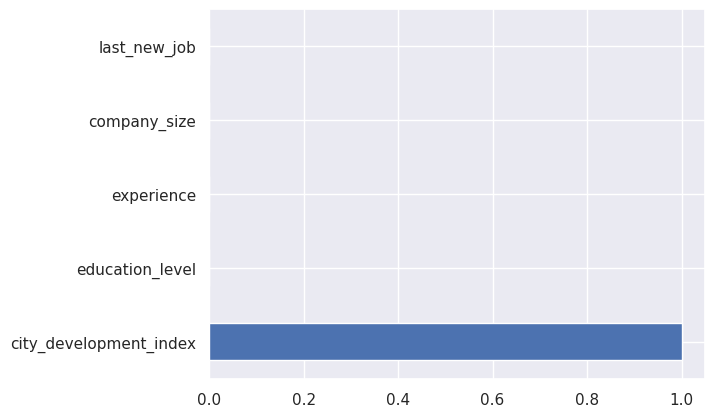

In [ ]:
# Print the importance level of each feature
weights_gini = model_fi_gini.feature_importances_           # Feature importance scores.
cols = X.columns                                            # Corresponding names of important features.
feature_importances_gini = pd.Series(weights_gini, index=cols)   # Generate Series containing importance level
print(feature_importances_gini)

# Plot the five most important features
feature_importances_gini.nlargest(5).plot(kind="barh")

## Regression Decision Tree

In [ ]:
# Initialize regression tree model
model_dt_reg = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])
model_dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=4)

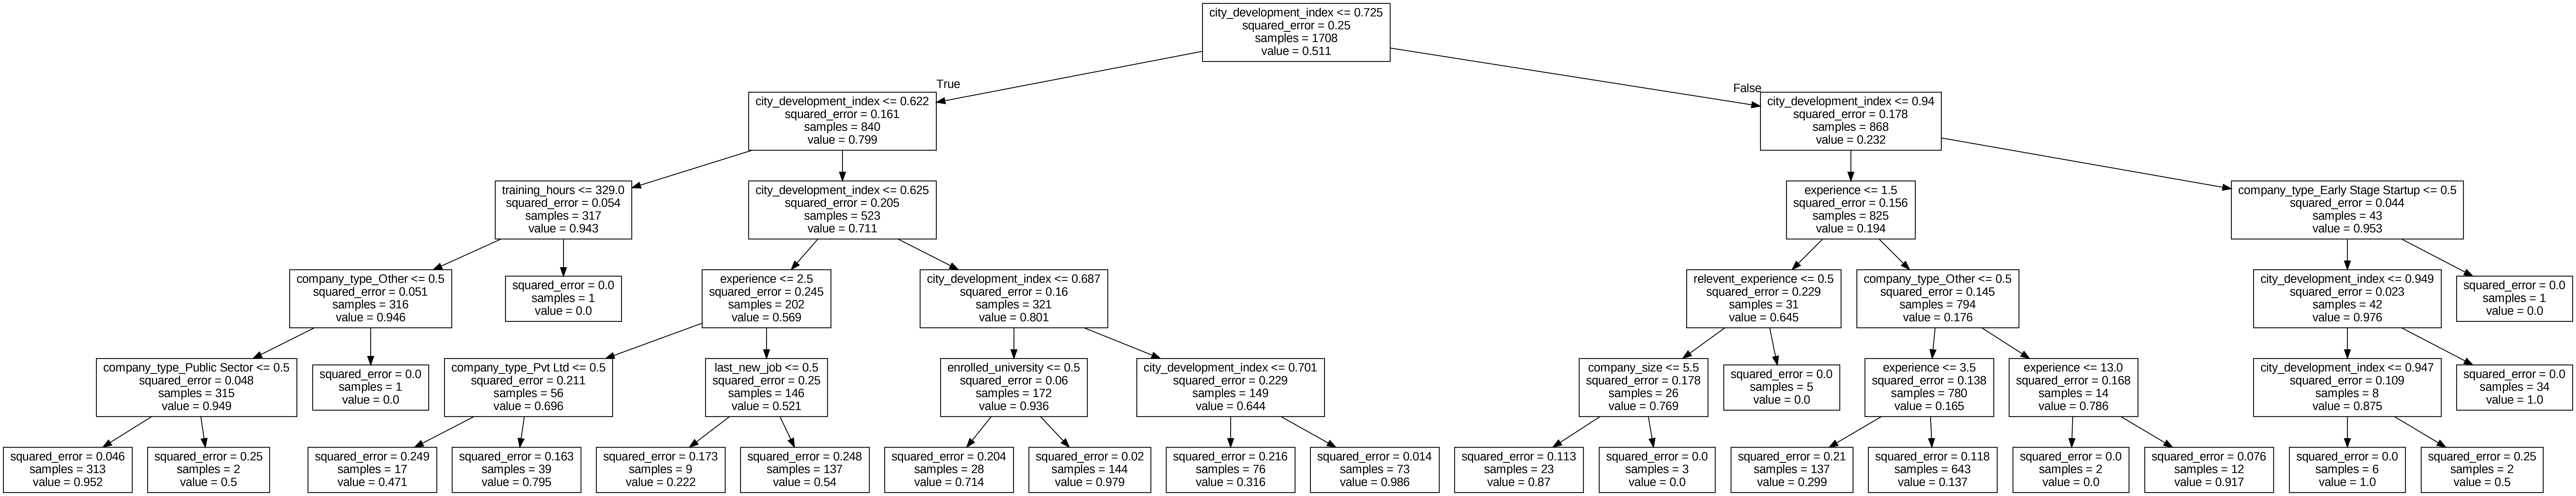

In [ ]:
# Visualize the regression tree model
dot_data = tree.export_graphviz(decision_tree=model_dt_reg, out_file='regression-tree.dot', feature_names=X.columns)     # Save model as 'regression-tree.dot'
call(['dot', '-Tpng', 'regression-tree.dot', '-o', 'regression-tree.png', '-Gdpi=300'])         # Convert the model to an image

Image(filename = 'regression-tree.png')     # Load and display file 'regression-tree.png'